In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import FunctionTransformer

In [2]:
df = pd.read_csv("/home/catpc/Downloads/11 titanic.csv",usecols=['Age','Fare','Survived'])


In [3]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [4]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

/tmp/ipykernel_17418/694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [6]:
df.isnull().sum()

Survived    0
Age         0
Fare        1
dtype: int64

In [7]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

/tmp/ipykernel_17418/1005235208.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].mean(),inplace=True)


In [8]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [9]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [10]:

df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [11]:
x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [12]:
x_train.shape, x_test.shape, y_train.shape , y_test.shape

((334, 2), (84, 2), (334,), (84,))

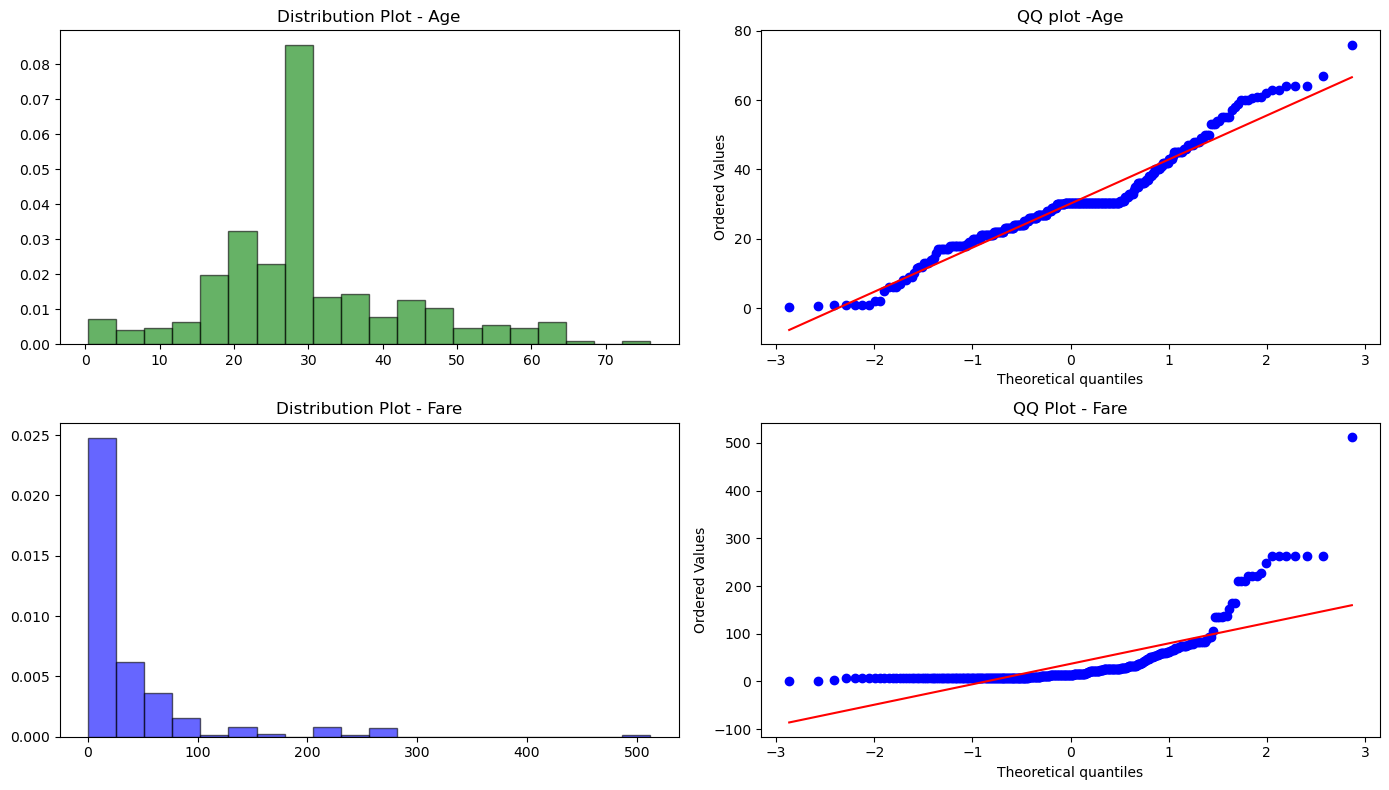

In [13]:
import matplotlib.pyplot as plt
import scipy.stats as stats

#create subplots with 2 rows and 2 column
fig, axs = plt.subplots(2,2,figsize=(14,8))


#plot the first distributon plot for age
axs[0,0].hist(x_train['Age'], bins=20, density=True, alpha=0.6,color='g',edgecolor='black')
axs[0,0].set_title('Distribution Plot - Age')



#plot the first QQ plot for age
stats.probplot(x_train['Age'], dist='norm', plot=axs[0,1])
axs[0,1].set_title('QQ plot -Age')


#plot the second distribution plot for Fare
axs[1,0].hist(x_train['Fare'], bins=20, density=True, alpha=0.6,color='b', edgecolor='black')
axs[1,0].set_title("Distribution Plot - Fare")


#stats the second QQ plot for fare
stats.probplot(x_train['Fare'],dist='norm',plot=axs[1,1])
axs[1,1].set_title('QQ Plot - Fare')

plt.tight_layout() #adjust layout to prevent overlappint
plt.show()

# Training modes before function transformer

In [14]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()


In [15]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)



In [16]:
print("Accuracy LR", accuracy_score(y_test,y_pred))
print("Accuracy DT", accuracy_score(y_test,y_pred1))

Accuracy LR 0.6071428571428571
Accuracy DT 0.5357142857142857


# Log Transformer

In [23]:
# Apply log transformation   keno bebhor kora hoy 

# অনেক সময় features (যেমনঃ income, age, price) 
# skewed থাকে বা large range থাকে।

# np.log1p মানে log(x + 1) → এটি ডেটার scale ছোট করে,
# skew কমায়, এবং অনেক মেশিন লার্নিং মডেলের 
# performance বাড়ায় (বিশেষ করে Logistic Regression এ)
# ।

trf = FunctionTransformer(func=np.log1p)
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)


# Train models on TRAIN data only
clf.fit(x_train_transformed, y_train)
clf2.fit(x_train_transformed, y_train)

# Predict on TEST data
y_pred_lr = clf.predict(x_test_transformed)
y_pred_dt = clf2.predict(x_test_transformed)

# Accuracy on TEST set
print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_dt))

Accuracy (Logistic Regression): 0.6190476190476191
Accuracy (Decision Tree): 0.5595238095238095


Text(0.5, 1.0, 'Fare after Log')

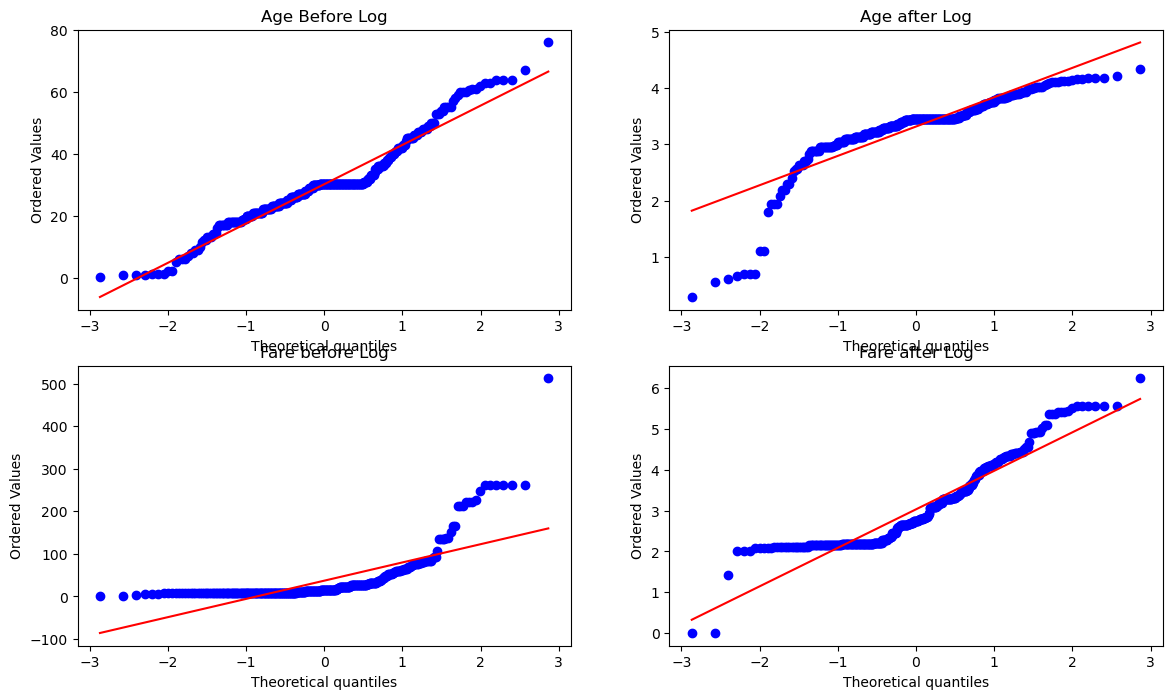

In [31]:
import matplotlib.pyplot as plt
import scipy.stats as stats

#create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2,2, figsize=(14,8))

#plot the first QQ plot for age before log
stats.probplot(x_train['Age'], dist='norm',plot=axs[0,0])
axs[0,0].set_title("Age Before Log")



#plot the second QQ plot for Age After Log
stats.probplot(x_train_transformed['Age'], dist='norm',plot=axs[0,1])
axs[0,1].set_title("Age after Log")


#plot the third QQ plot for Fare Before Log
stats.probplot(x_train['Fare'],dist='norm', plot=axs[1,0])
axs[1,0].set_title("Fare before Log")


#plot the forth QQ plot for Fare After Log
stats.probplot(x_train_transformed['Fare'],dist='norm', plot=axs[1,1])
axs[1,1].set_title("Fare after Log")

# Reciprocal Transformer

In [32]:
#define the reciprocal transformation function
def reciprocal_transform(x):
    #add a small constant value to avoid zero division
    x = x + 1e-6 #you can adjust the constant value as needed
    return 1 / x



In [34]:
#Create the functionTransformer
trf = FunctionTransformer(func = reciprocal_transform)

#apply the transformation to the training and test data 
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)


#now you can proceed with fitting your classifiers
clf.fit(x_train_transformed, y_train)
clf2.fit(x_train_transformed,y_train)

y_pred = clf.predict(x_test_transformed)
y_pred1 = clf2.predict(x_test_transformed)

#print the accuracy 
print("Accuracy LR: ", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test,y_pred1))


Accuracy LR:  0.6071428571428571
Accuracy DT 0.5595238095238095


Text(0.5, 1.0, 'Fare after reciprocal')

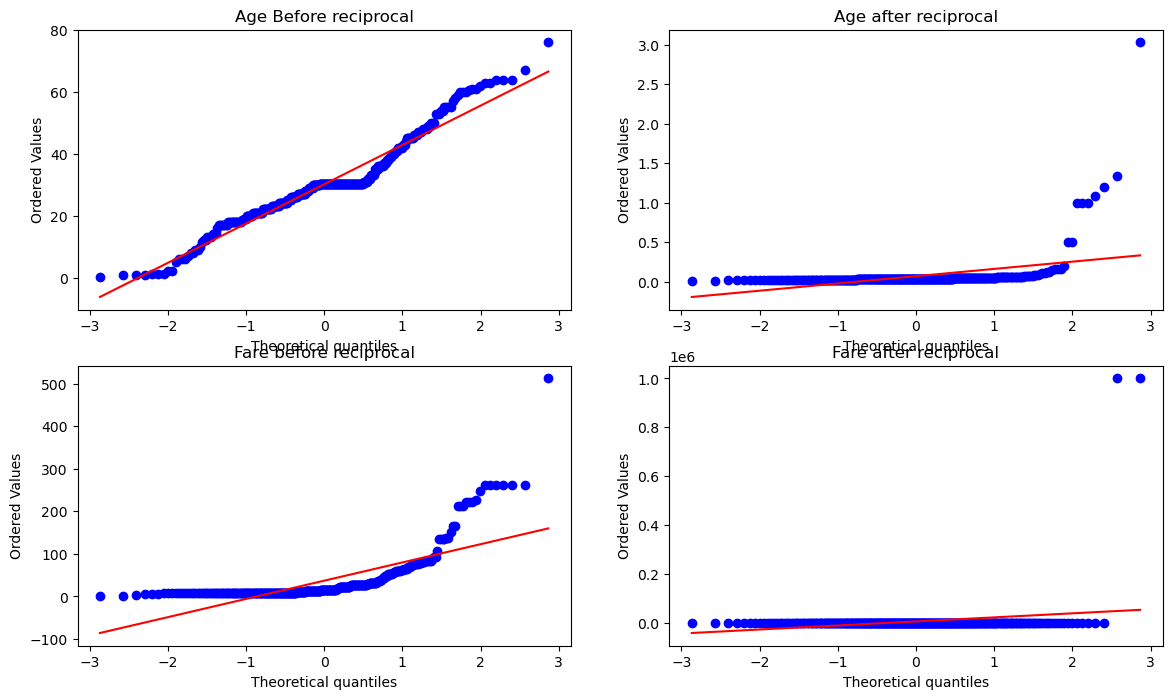

In [38]:
import matplotlib.pyplot as plt
import scipy.stats as stats

#create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2,2, figsize=(14,8))

#plot the first QQ plot for age before log
stats.probplot(x_train['Age'], dist='norm',plot=axs[0,0])
axs[0,0].set_title("Age Before reciprocal")



#plot the second QQ plot for Age After Log
stats.probplot(x_train_transformed['Age'], dist='norm',plot=axs[0,1])
axs[0,1].set_title("Age after reciprocal")


#plot the third QQ plot for Fare Before Log
stats.probplot(x_train['Fare'],dist='norm', plot=axs[1,0])
axs[1,0].set_title("Fare before reciprocal")


#plot the forth QQ plot for Fare After Log
stats.probplot(x_train_transformed['Fare'],dist='norm', plot=axs[1,1])
axs[1,1].set_title("Fare after reciprocal")

# Square Transformer

In [43]:
def square_transform(x):
    return x**2

#create the FunctionTransformer
trf_square = FunctionTransformer(func=square_transform)



#apply the transformation to the 'Fare ' feature in the training and test data
x_train_transformed_fare = x_train['Fare'].values.reshape(-1,1) #reshape to ensure 2d array
x_test_transformed_fare = x_test['Fare'].values.reshape(-1,1)#reshpae to ensure 2d array



x_train_transformed_fare = trf_square.fit_transform(x_train_transformed_fare)
x_test_transformed_fare = trf_square.transform(x_test_transformed_fare)




#now you can proceed with fitting your classifiers using the transformed "fare feature"
clf.fit(x_train_transformed_fare, y_train)
clf2.fit(x_train_transformed_fare, y_train)

#prediction
y_pred = clf.predict(x_test_transformed_fare)
y_pred1 = clf2.predict(x_test_transformed_fare)


#print the accuracy 
print("Accuracy LR: ", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test,y_pred1))




Accuracy LR:  0.6071428571428571
Accuracy DT 0.6071428571428571


Text(0.5, 1.0, 'Fare after Log')

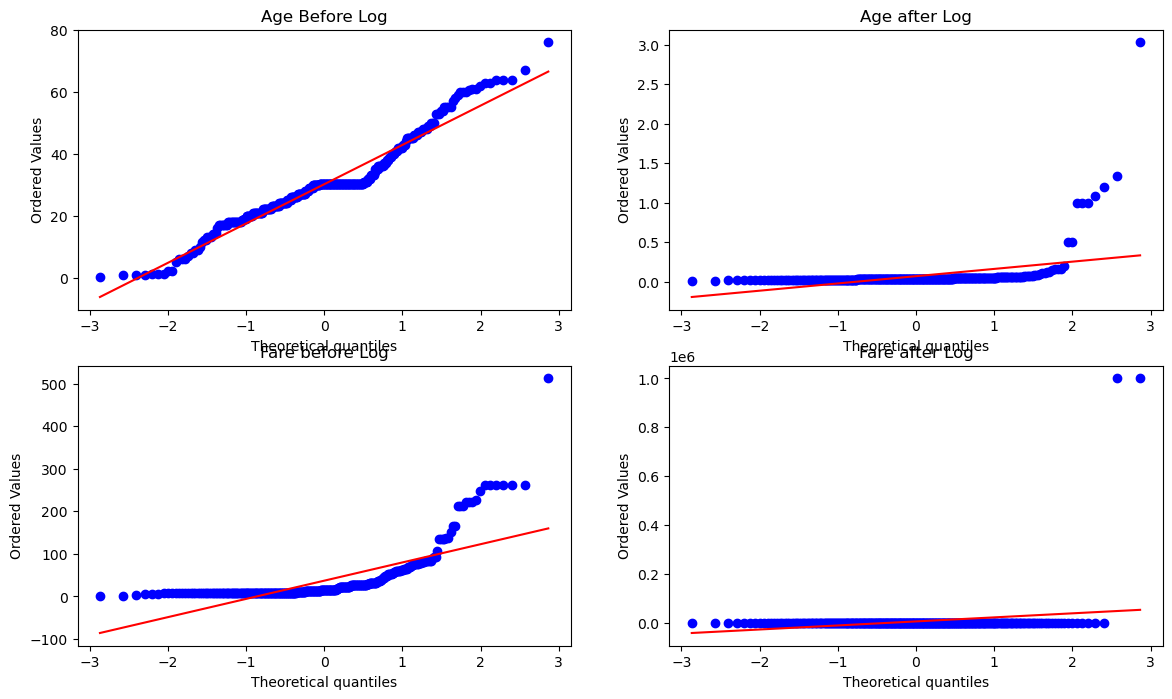

In [44]:
import matplotlib.pyplot as plt
import scipy.stats as stats

#create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2,2, figsize=(14,8))

#plot the first QQ plot for age before log
stats.probplot(x_train['Age'], dist='norm',plot=axs[0,0])
axs[0,0].set_title("Age Before squar")



#plot the second QQ plot for Age After Log
stats.probplot(x_train_transformed['Age'], dist='norm',plot=axs[0,1])
axs[0,1].set_title("Age after squar")


#plot the third QQ plot for Fare Before Log
stats.probplot(x_train['Fare'],dist='norm', plot=axs[1,0])
axs[1,0].set_title("Fare before squar")


#plot the forth QQ plot for Fare After Log
stats.probplot(x_train_transformed['Fare'],dist='norm', plot=axs[1,1])
axs[1,1].set_title("Fare after squar")